In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**1) Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [27]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

$$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \: b_0 = \overline{y} - b_1 \cdot {\overline{x}}$$

In [4]:
b1 = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - (zp.mean() ** 2))
b1

2.620538882402765

In [6]:
b0 = ks.mean() - b1 * zp.mean()
b0

444.1773573243596

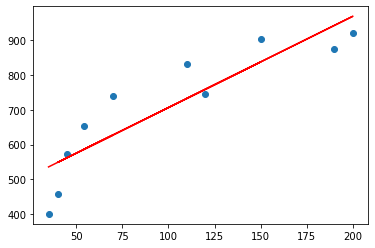

In [12]:
ox = zp
oy = b0 + b1 * ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='red')

$$X = \left(
\begin{array}{ccc}
x_{10} & \dots & x_{1k} \\
x_{20} & \dots & x_{2k} \\
\vdots & \ddots & \vdots \\
x_{m0} & \dots & x_{mk}
\end{array}
\right), \: 
y = \left(
\begin{array}{c}
y_1 \\
\vdots \\
y_m
\end{array}
\right)$$
<br>
$$X \cdot b = y$$
<br>
$$b = (X^\top X)^{-1} X^\top y.$$

In [29]:
zp = zp.reshape(-1, 1)
ks = ks.reshape(-1, 1)

In [36]:
X = np.hstack((np.ones((zp.shape[0], 1)), zp))
y = ks

In [34]:
XTX = X.T.dot(X)

np.linalg.det(XTX)

349464.00000000023

In [37]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(y)

print(b)

[[444.17735732]
 [  2.62053888]]


без intercept

In [38]:
X = zp
y = ks

In [39]:
XTX = X.T.dot(X)

XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X.T).dot(y)

print(b)

[[5.88982042]]


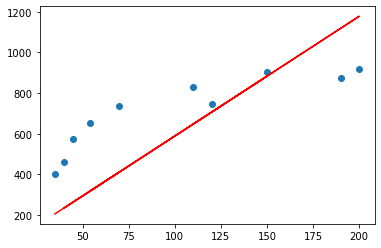

In [42]:
ox = zp
oy = b * ox

plt.scatter(zp, ks)
plt.plot(ox, oy, color='red')